For this data analysis project, I have selected a house pricing dataset from Kaggle that can be found on the following link: 

https://www.kaggle.com/datasets/jacksondivakarr/house-price-prediction-dataset

This dataset related to price of houses in major cities of India. Let's perform data analysis on it.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
#Importing the dataset
dataset=pd.read_csv("/kaggle/input/houses/House.csv")

In [4]:
#Viewing the data
dataset

,City,Price,Area,Location,Bedrooms
0,Bangalore,30000000,3340,JP Nagar Phase 1,4
1,Bangalore,7888000,1045,Dasarahalli on Tumkur Road,2
2,Bangalore,4866000,1179,Kannur on Thanisandra Main Road,2
3,Bangalore,8358000,1675,Doddanekundi,3
4,Bangalore,6845000,1670,Kengeri,3
...,...,...,...,...,...
29130,Mumbai,14500000,1180,Mira Road East,2
29131,Mumbai,14500000,530,Naigaon East,1
29132,Mumbai,4100000,700,Shirgaon,1
29133,Mumbai,2750000,995,Mira Road East,2


As we can see that the dataset consists of 29135 entries of houses in few cities of India. The features are city name, area in square feet, location and number of bedrooms. Price is the output of the dataset.

In [6]:
#Checking data types
dataset.dtypes

City        object
Price        int64
Area         int64
Location    object
Bedrooms     int64
dtype: object

In [9]:
#Checking for null values
dataset.isnull().sum()

City        0
Price       0
Area        0
Location    0
Bedrooms    0
dtype: int64

There are no null values

We can see that the data type of the city name and location is string while other features are in integers 

In [8]:
#Checking description of data
dataset.describe()

,Price,Area,Bedrooms
count,2.913500e+04,29135.000000,29135.000000
mean,1.195267e+07,1301.816475,2.421074
std,2.387647e+07,767.862339,0.821016
min,2.000000e+06,200.000000,1.000000
25%,4.179999e+06,870.000000,2.000000
50%,6.884999e+06,1137.000000,2.000000
75%,1.230000e+07,1504.000000,3.000000
max,8.546000e+08,16000.000000,9.000000


It is clear that prices of houses range from 2 million to 854 million. Secondly, the mean house price is 11 million, meaning that most houses are on the lower side of the range. This also shows that we might be dealing with outliers. We will explore outliers through plots later on. 

The amount of area ranges from 200 sq feet to 16000 square feet with an average of 1302 square feet. Again most houses are on the lower side of the range. Similar is the case of bedrooms that range from 1 to 9 with an average of 2.42 (rounding off to 2)    

For the purpose of data analysis, we do not need the location column so we are dropping that

In [10]:
dataset=dataset.drop(columns=["Location"])
dataset

,City,Price,Area,Bedrooms
0,Bangalore,30000000,3340,4
1,Bangalore,7888000,1045,2
2,Bangalore,4866000,1179,2
3,Bangalore,8358000,1675,3
4,Bangalore,6845000,1670,3
...,...,...,...,...
29130,Mumbai,14500000,1180,2
29131,Mumbai,14500000,530,1
29132,Mumbai,4100000,700,1
29133,Mumbai,2750000,995,2


In [18]:
#Checking distribution of cities
dataset["City"].value_counts()

City
Mumbai       6925
Kolkata      6275
Bangalore    5521
Chennai      4307
Delhi        4109
Hyderabad    1998
Name: count, dtype: int64

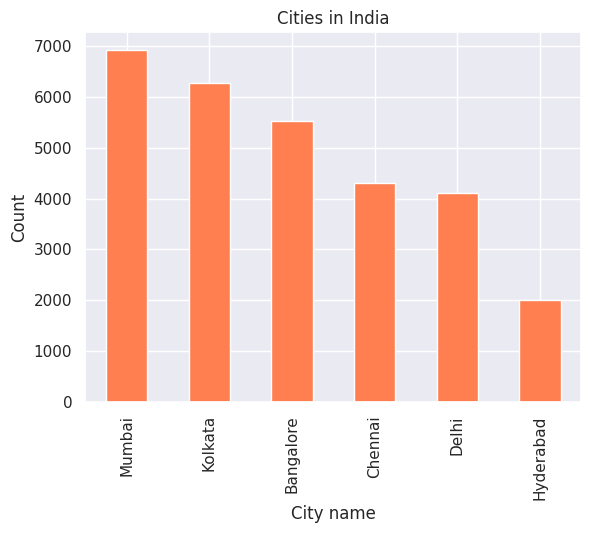

In [40]:
#Plotting the count of cities
sns.set(style="darkgrid")
dataset["City"].value_counts().plot(kind='bar', color="coral")
plt.xlabel('City name')
plt.ylabel('Count')
plt.title("Cities in India");

Through the pandas value_count function and the above plot, we can see that Mumbai homes have the highest occurances while Hyderabad homes have the lowest. 

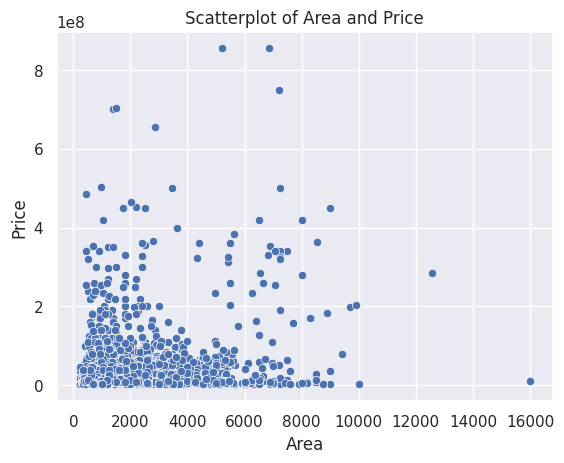

In [42]:
#Making scatter plots
sns.scatterplot(x=dataset.Area, y=dataset.Price)


plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Scatterplot of Area and Price');

It is shown that most houses are less than 8000 square feet in area and their prices are largely below 4 million

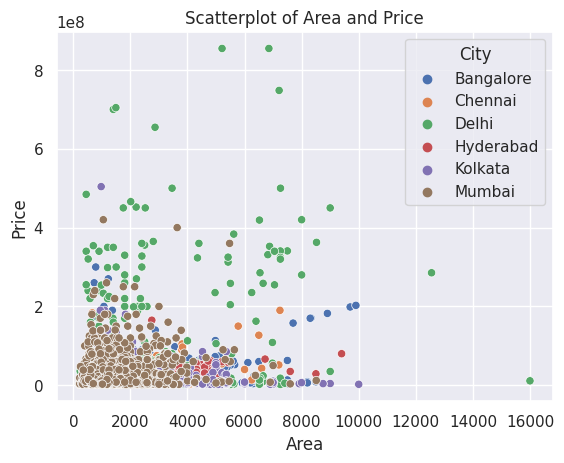

In [44]:
sns.scatterplot(x=dataset.Area, y=dataset.Price, hue=dataset.City)


plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Scatterplot of Area and Price');

By classifiying the scatter city by city, we can see that prices of Delhi houses are on a higher side while prices of Mumbai and Kolkata houses are on the lower side. The prices of Bangalore houses are somewhere in between

<Axes: xlabel='Bedrooms', ylabel='Area'>

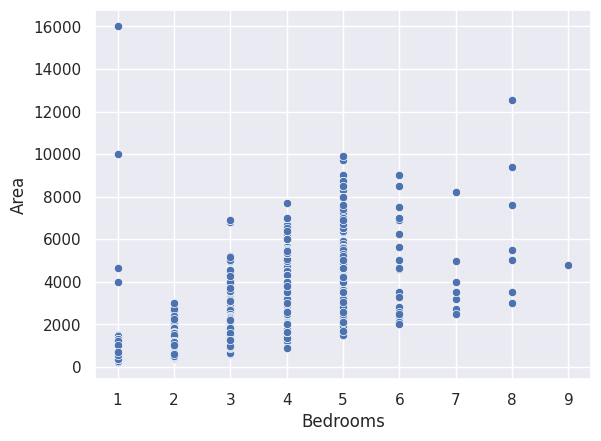

In [48]:
#Making scatter of Bedrooms and Area
sns.pie(x=dataset.Bedrooms, y=dataset.Area)

A linear trend between number of bedrooms and area is visible in this graph

<Axes: xlabel='Area', ylabel='Price'>

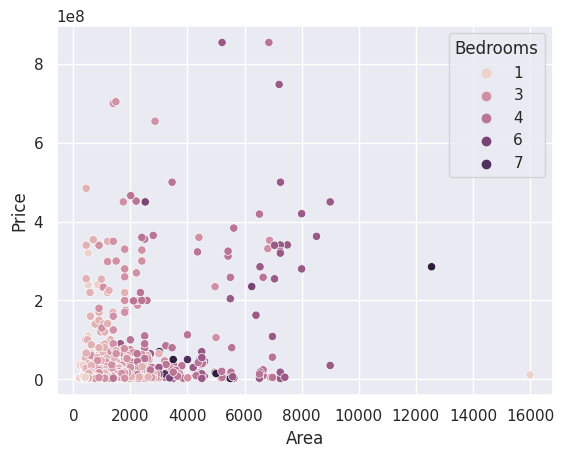

In [62]:
#Checking price vs area plot for Delhi
sns.scatterplot(x=dataset.query("City=='Delhi'").Area,y=dataset.query("City=='Delhi'").Price, hue=dataset.query("City=='Delhi'").Bedrooms)

Our dataset has no entry of Delhi with 2 or 5 bedrooms. The above graph also shows that 1 and 3 bedroom houses have generally lower area than houses with 4 or more bedrooms. However, Some 1 or 3 bedroom houses are far pricier than houses having more bedrooms. This can be because they are located in posh areas. 

<Axes: xlabel='Area', ylabel='Price'>

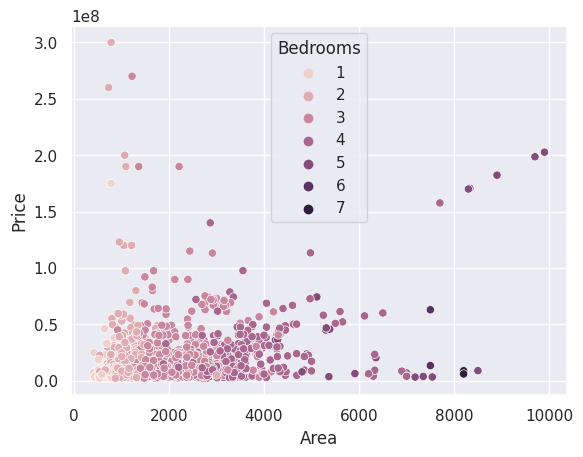

In [63]:
#Checking price vs area plot for Bangalore
sns.scatterplot(x=dataset.query("City=='Bangalore'").Area,y=dataset.query("City=='Bangalore'").Price, hue=dataset.query("City=='Bangalore'").Bedrooms)

For Bangalore, it can be easily seen that houses with 1 and 2 bedrooms have lower area than houses of more bedrooms. Again some houses with good amount of bedrooms are cheaper than those with 1 or 2 bedrooms.

<Axes: xlabel='Area', ylabel='Price'>

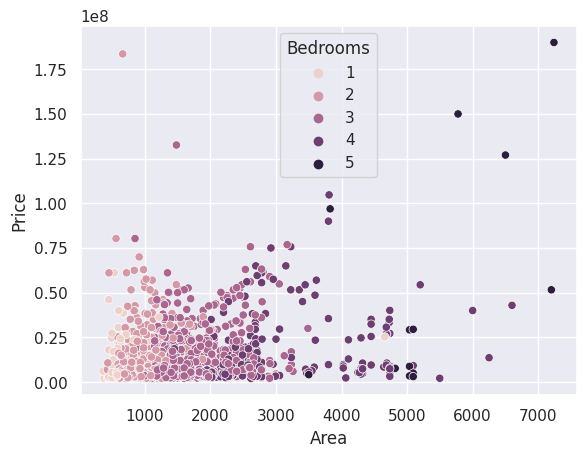

In [64]:
#Checking price vs area plot for Chennai
sns.scatterplot(x=dataset.query("City=='Chennai'").Area,y=dataset.query("City=='Chennai'").Price, hue=dataset.query("City=='Chennai'").Bedrooms)

In Chennai, the trend is different. Houses with more bedrooms are higher priced

<Axes: xlabel='Area', ylabel='Price'>

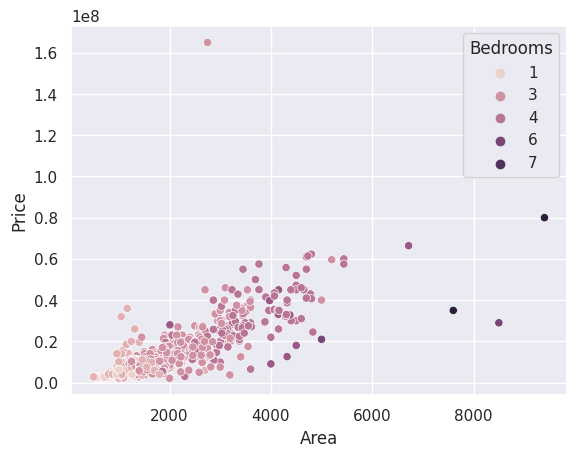

In [65]:
#Checking price vs area plot for Hyderabad
sns.scatterplot(x=dataset.query("City=='Hyderabad'").Area,y=dataset.query("City=='Hyderabad'").Price, hue=dataset.query("City=='Hyderabad'").Bedrooms)

The pattern for Hyderabad is more linear and easy to gauge. Houses with more bedrooms are priced at a higher rate 

<Axes: xlabel='Area', ylabel='Price'>

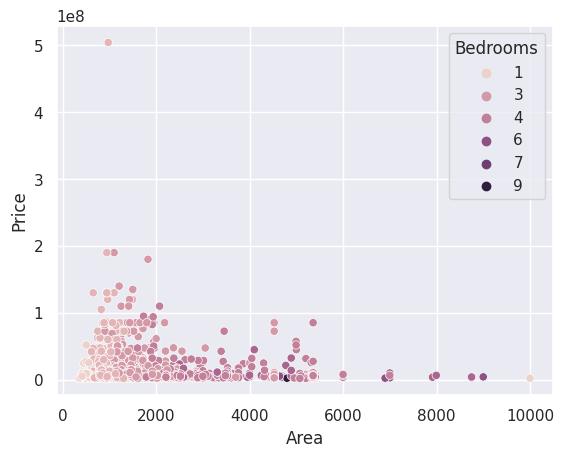

In [66]:
#Checking price vs area plot for Kolkata
sns.scatterplot(x=dataset.query("City=='Kolkata'").Area,y=dataset.query("City=='Kolkata'").Price, hue=dataset.query("City=='Kolkata'").Bedrooms)

In Kolkata, all houses are priced below 2 million and houses with lower amount of bedrooms have higher variation in prices and many are much costlier than houses with higher amount of bedrooms

<Axes: xlabel='Area', ylabel='Price'>

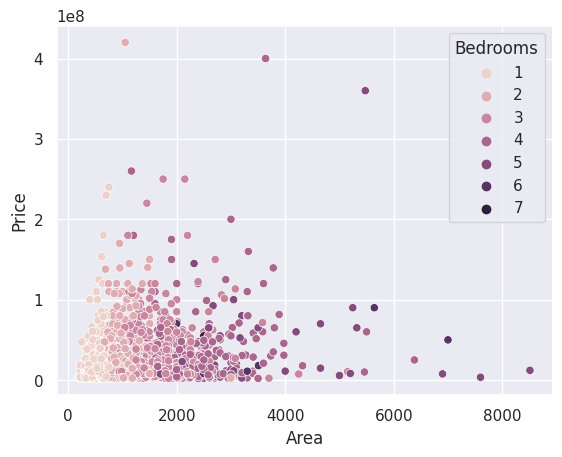

In [67]:
#Checking price vs area plot for Mumbai
sns.scatterplot(x=dataset.query("City=='Mumbai'").Area,y=dataset.query("City=='Mumbai'").Price, hue=dataset.query("City=='Mumbai'").Bedrooms)

In Mumbai, there is massive variation in prices of houses but generally, the ones with lower amount of bedrooms occupy lower area